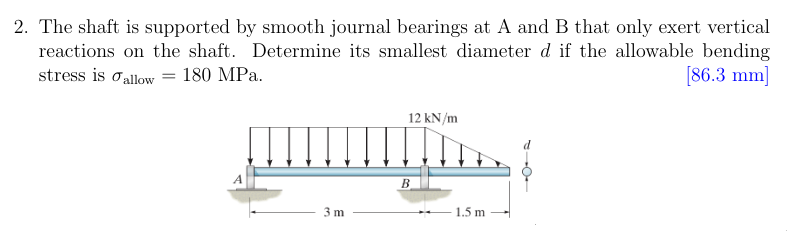

**IMPORTANT NOTE:** 
Here, I am finding out the SFD and BMD using a mathematical approach which is not part of your syllabus. 

_**You do NOT have to learn this. Please follow the simple procedure that has been taught in class!**_

However, you can check your SFD and BMD with the figures given here. 


=========== **OUT OF SYLLABUS portion begins here** ===========

In [1]:
import sympy as sym

from sympy import SingularityFunction as SF

In [2]:
x = sym.symbols('x')

In [3]:
L1 = 3
L2 = 1.5
L3 = 1
w0 = 12e3

R1 = 0
R2 = 0

In [4]:
q1 = -w0*SF(x,0,0)
q2 = w0*(SF(x,L1,1)/L2) - w0*SF(x,L1+L2,1)/L2
qload = q1 + q2 

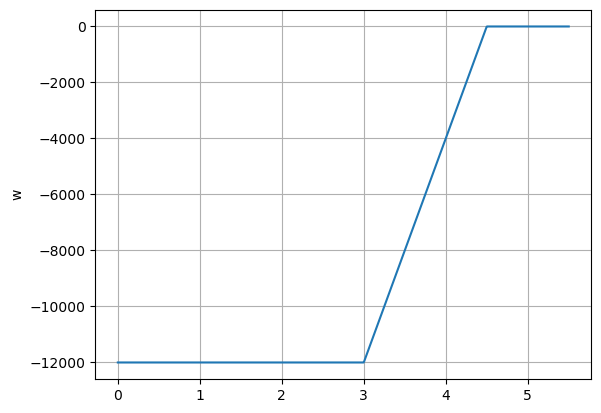

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 1001
xx = np.linspace(0,L1+L2+L3,N)

q_num = np.zeros(N)

for j in range(0,N):
    q_num[j] = qload.subs(x,xx[j])

plt.plot(xx,q_num)
plt.ylabel('w')
plt.grid('True')

In [6]:
R1, R2 = sym.symbols('R_1, R_2')

In [7]:
q = R1*SF(x,0,-1) + R2*SF(x,L1,-1) + qload
q

R_1*SingularityFunction(x, 0, -1) + R_2*SingularityFunction(x, 3, -1) - 12000.0*SingularityFunction(x, 0, 0) + 8000.0*SingularityFunction(x, 3, 1) - 8000.0*SingularityFunction(x, 4.5, 1)

In [8]:
V = sym.integrate(q,x)
V

R_1*SingularityFunction(x, 0, 0) + R_2*SingularityFunction(x, 3, 0) - 12000.0*SingularityFunction(x, 0, 1) + 4000.0*SingularityFunction(x, 3, 2) - 4000.0*SingularityFunction(x, 4.5, 2)

In [9]:
M = sym.integrate(V,x)
M

R_1*SingularityFunction(x, 0, 1) + R_2*SingularityFunction(x, 3, 1) - 6000.0*SingularityFunction(x, 0, 2) + 1333.33333333333*SingularityFunction(x, 3, 3) - 1333.33333333333*SingularityFunction(x, 4.5, 3)

In [10]:
eq1 = sym.Eq(V.subs(x,L1+L2),0)
eq2 = sym.Eq(M.subs(x,L1+L2),0)

display(eq1, eq2)

Eq(R_1 + R_2 - 45000.0, 0)

Eq(4.5*R_1 + 1.5*R_2 - 117000.0, 0)

In [11]:
soln = sym.solve([eq1,eq2],[R1,R2])
display(soln)

{R_1: 16500.0000000000, R_2: 28500.0000000000}

In [12]:
V_soln = V.subs(soln)
display(V_soln)

M_soln = M.subs(soln)
display(M_soln)

16500.0*SingularityFunction(x, 0, 0) - 12000.0*SingularityFunction(x, 0, 1) + 28500.0*SingularityFunction(x, 3, 0) + 4000.0*SingularityFunction(x, 3, 2) - 4000.0*SingularityFunction(x, 4.5, 2)

16500.0*SingularityFunction(x, 0, 1) - 6000.0*SingularityFunction(x, 0, 2) + 28500.0*SingularityFunction(x, 3, 1) + 1333.33333333333*SingularityFunction(x, 3, 3) - 1333.33333333333*SingularityFunction(x, 4.5, 3)

================== **OUT OF SYLLABUS portions ends here** ===============

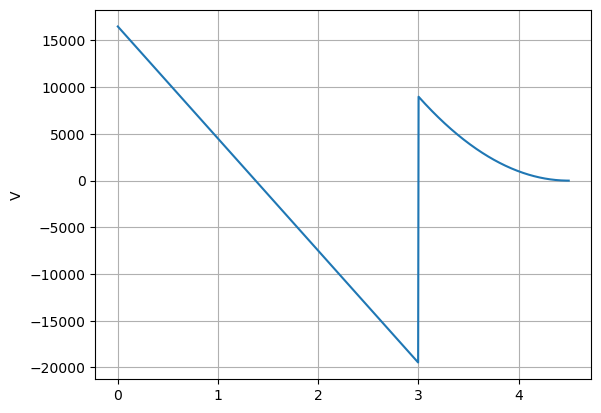

In [13]:
import numpy as np
import matplotlib.pyplot as plt

N = 1001
xx = np.linspace(0,L1+L2,N)

V_num = np.zeros(N)
M_num = np.zeros(N)

for j in range(0,N):
    V_num[j] = V_soln.subs(x,xx[j])
    M_num[j] = M_soln.subs(x,xx[j])

plt.plot(xx,V_num)
plt.ylabel('V')
plt.grid('True')

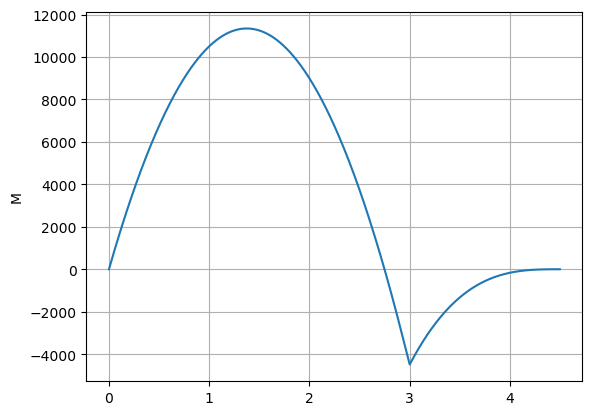

In [14]:
plt.plot(xx,M_num)
plt.ylabel('M')
plt.grid('True')

In [15]:
M_max = max(abs(M_num))
display(M_max)

11343.726

The flexural stress is given by:
\begin{gather*}
\sigma = \frac{32 M}{\pi d^3}, \\
\end{gather*}

Now, this stress must be less than the allowable stress:
\begin{gather*}
\sigma \leq \sigma_{\rm all}, \\
\implies \frac{32 M}{\pi d^3} \leq \sigma_{\rm all}, \\
\implies d \geq \left( \frac{32M}{\pi \sigma} \right)^{1/3}
\end{gather*}

In [16]:
from math import pi

In [17]:
sigma_all = 180e6
(32*M_max/(pi*sigma_all))**(1/3)

0.08626363927476875